In [1]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui



In [2]:
# Papildomai importuojame: 
from sklearn.linear_model import LinearRegression  # Tiesinės regresijos modelis
from sklearn.model_selection import train_test_split  # Duomenų padalijimas į treniravimo ir testavimo rinkinius


In [22]:
# CSV failo nuskaitymas 

file_path = r"C:\Users\Pauliussl\Paskaita68\insurance.csv"
try:
    ins= pd.read_csv(file_path)
    print(ins.head())
except FileNotFoundError:
    print(f"Failas nerastas: {file_path}")


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [71]:
#Patikriname ar nera tusciu verciu 
ins.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='charges'>

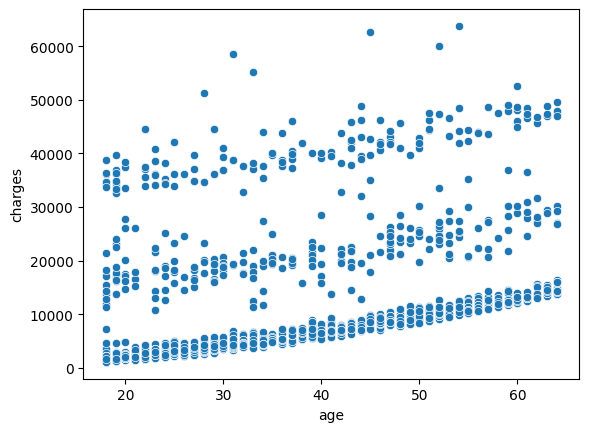

In [25]:
#Nusibraizome greita scatter plot
sns.scatterplot(data=ins, x='age', y='charges')  

In [50]:
X = ins['age'].values.reshape(-1, 1)   #reshaper perdaro i dvimati masyva
y = ins['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)     
                                    #33proc duomenu naudosime modelio tikrinimui
                                    #random state = nustatome kad kiekvienu perleidimu grazintu tas pacias eilutes testavimui/trainingui
                                    #train_test_split() - funkcija, skirta padalyti duomenų rinkinį į mokymo (train) ir testavimo (test) dalis, kas yra labai svarbu, siekiant įvertinti mašininio mokymosi modelio veikimą.

fit = LinearRegression().fit(X_train, y_train)   #apmokinome fit masyva
predicted = fit.predict(X_test); predicted      #patikriname vertes 

spejimai = pd.Series(data=predicted, name = 'Spejimai'); spejimai   #susidedame i Series objekta 
orig_rez = pd.Series(data=y_test, name='YTest')                     #susidedame i Series objekta 

res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis = 1); res.head()  #sujungiame spejimus ir fakta i viena lentele 

,YTest,Spejimai
0,9095.06825,14794.087864
1,5272.17580,12586.244564
2,29330.98315,19455.090386
3,9301.89355,15039.403786
4,33750.29180,8415.873887


<Axes: >

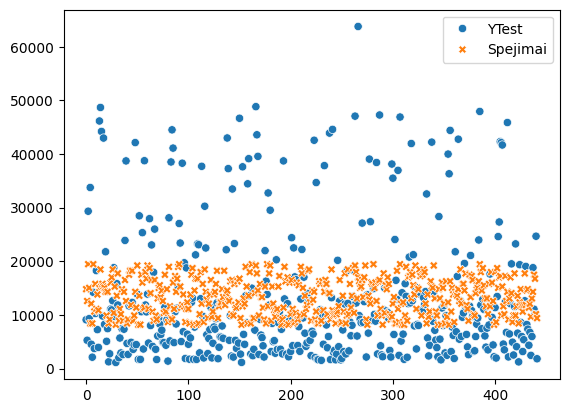

In [57]:
#Follow up ---
spejimai = pd.Series(data=predicted, name = 'Spejimai'); spejimai   #susidedame i Series objekta 
orig_rez = pd.Series(data=y_test, name='YTest')                     #susidedame i Series objekta 
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis = 1); res.head()  #sujungiame spejimus ir fakta i viena lentele 
sns.scatterplot(data=res)   #nusibraizome spejimus ir fakta i viena grafika 

<Axes: >

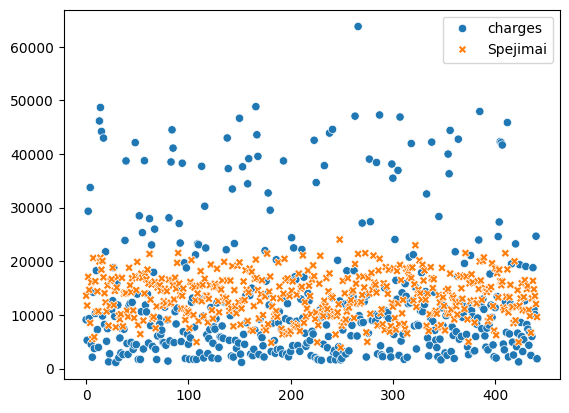

In [70]:
#Follow up ---
X = ins[['age','bmi','children']]   #duodame 3 stulpelius, vietoje vieno 
y = ins['charges']                  #nenaudojame .values nes turime is karto trimati masyva 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
                                #33proc duomenu naudosime modelio tikrinimui
                                #random state = nustatome kad kiekvienu perleidimu grazintu tas pacias eilutes testavimui/trainingui
                                #train_test_split() - funkcija, skirta padalyti duomenų rinkinį į mokymo (train) ir testavimo (test) dalis, kas yra labai svarbu, siekiant įvertinti mašininio mokymosi modelio veikimą.

fit = LinearRegression().fit(X_train, y_train)   #apmokome modeli 
pred = fit.predict(X_test)              #gavome spejimus 
spejimai = pd.Series(data=pred,name='Spejimai')  #pasiverciame i Series objekta 
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis = 1); res.head(5)   
                                #apjungiame i viena lentele 
                                # #axis=1 - jungiame eilute su eilute 
                                
#tikslumas pagerejo itraukiant 3 vietoje 1 kintamojo. 

sns.scatterplot(data=res)

In [75]:
#Modelio tikslumo ivertinimas procentais
fit.score(X_test, y_test)*100.0   

13.51277604693102

In [94]:
column_origin = pd.get_dummies(ins['sex'])                #sugeneruoja naujus stulpelius pagal rastus irasus 
ins2 = pd.concat([ins, column_origin], axis=1); ins2      #prijungiame
sm =pd.get_dummies(ins['smoker'])               #sugeneruoja naujus stulpelius pagal rastus irasus 
ins3 = pd.concat([ins2,sm], axis=1); ins3       #prijungiame 
reg = pd.get_dummies(ins['region'])
mpg2 = pd.concat([ins3,reg], axis=1); mpg2

X = mpg2.drop(columns=['sex','smoker','region','charges'])
y = mpg2['charges']; X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0   

75.87422388407032

<Axes: >

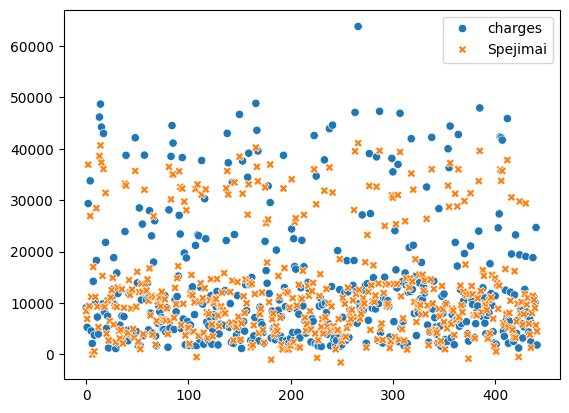

In [102]:
spejimai = pd.Series(data=pred,name='Spejimai')  #pasiverciame i Series objekta 
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis = 1); res.head(5)   
sns.scatterplot(data=res)

In [103]:
X.columns
fit.predict(np.reshape([32,22,1,1,0,1,0], (1,-1)))    
                #suvedame vartotojo ivedamus duomenis
                #pateikiame sarasa atitinkamu parametru 

array([3564.73848017])

In [ ]:
# Uzduotis: sukurkite modeli ant nauju duomenu 

mpg = sns.load_dataset('mpg'); mpg.head(3)
column_origin = pd.get_dummies(mpg['origin'])                #sugeneruoja naujus stulpelius pagal rastus irasus 
mpg2 = pd.concat([mpg, column_origin], axis=1);              #prijungiame

mpg2['horsepower'] = mpg2['horsepower'].fillna(mpg2['horsepower'].mean())
mpg2['horsepower'] = pd.to_numeric(mpg2['horsepower'], errors='coerce')

# mpg3 = mpg2[mpg2['cylinders'] == a]
# mpg5 = mpg3[(mpg3['horsepower'] >= (b - 30)) & (mpg3['horsepower'] <= (b + 30))] 
# # mpg5 = mpg4[(mpg4['model_year'] >= (c-4)) & (mpg4['model_year'] <= (c+4))]

X = mpg2.drop(columns=['origin', 'name','mpg'])
y = mpg2['mpg'].dropna(); 


X = X.dropna()  # Pašalina eiles su NaN reikšmėmis
y = y[X.index]  # Užtikrina, kad y atitiktų X po eilučių pašalinimo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)




[32.4896536  29.22027615 20.71924286 16.86489351 12.55989002 26.95118879
 27.52158691  9.90015993 17.07839714 21.63274064 12.6365523  35.92443241
 24.62106348 13.66215725 23.27976074  6.35497432 29.1560811  25.28890557
 16.36244466 36.18636662 24.81393605 18.48331178 28.53230126 28.22320822
 14.70228676 36.18131621 26.66097623 24.35909842 21.69759049  8.70198925
 27.96249063 36.09637058 20.57519499 25.79099287 34.03482189 12.25696611
 22.63747084 21.83750712 12.44887978 27.94073254 26.07132474 28.4555847
 21.39724254  7.66518723 24.21593552 34.78855934 27.71870565 25.48701917
 23.73667325 28.70162852 21.96382087 33.37098644 32.4931023  11.01585115
 27.53477987  9.87257907 19.78930219 29.7163758  22.4362693  20.06287009
 16.22259722 31.68069591 23.4092677  21.7793151  20.52603224 25.13276325
 24.60750329 31.8310215  27.63640396 12.58705529 30.63056861 13.19972573
  9.92532379 18.82624159 27.4102122  22.15981025 20.24617493 29.33268463
 30.33754679 20.20121511 15.04451606 24.87763596 35.

In [12]:
a = int(input('Įveskite cilindrų skaičių (3-8): '))
b = float(input('Įveskite displacement '))
c = int(input('Įveskite horsepower'))
d = int(input('Įveskite weight'))
e = int(input('Įveskite acceleration'))
f = int(input('Įveskite model_year'))

pag_salis = input('Įveskite europe/japan/usa: ').strip().lower()
g, h, i = 0, 0, 0  
if pag_salis == 'europe':
    g = 1
elif pag_salis == 'japan':
    h = 1
elif pag_salis == 'usa':
    i = 1
else:
    print("Neteisingai")
input_data = np.array([[a, b, c, d, e, f, g, h, i]])  # Sukuriame masyvą
prediction = fit.predict(input_data)  # Prognozė



In [13]:
print(prediction)

[22.91916765]


In [9]:
mpg2.drop(columns=['origin', 'name','mpg'])

,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,8,307.0,130.0,3504,12.0,70,False,False,True
1,8,350.0,165.0,3693,11.5,70,False,False,True
2,8,318.0,150.0,3436,11.0,70,False,False,True
3,8,304.0,150.0,3433,12.0,70,False,False,True
4,8,302.0,140.0,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,False,False,True
394,4,97.0,52.0,2130,24.6,82,True,False,False
395,4,135.0,84.0,2295,11.6,82,False,False,True
396,4,120.0,79.0,2625,18.6,82,False,False,True


In [19]:
fit.score(X_test, y_test)*100.0 

84.53672862677033

Modelio tikslumas: 84.54%
